In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
def passive_square(x, y, z, t, xp):
    xc, yc = x - 0.5, y - 0.75
    return xp.where(
        (xp.abs(xc) < 0.15) & (xp.abs(yc) < 0.15),
        1.0,
        0.0,
    )


sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.slotted_disk(
        idx, x, y, z, t, rotation="ccw", xp=xp
    ),
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    p=3,
    MOOD=True,
    max_MOOD_iters=1,
    NAD=0,
    # PAD={"rho": (0.0, 1.0)},
    # PAD_tol=1e-3,
    # SED=True,
)

sim.run(n=20)

Step #20 @ t=2.54e-01 | dt=1.27e-02 | (done)                                                        


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.00046988744599844564), np.float64(1.0))

<class 'matplotlib.colorbar.Colorbar'>


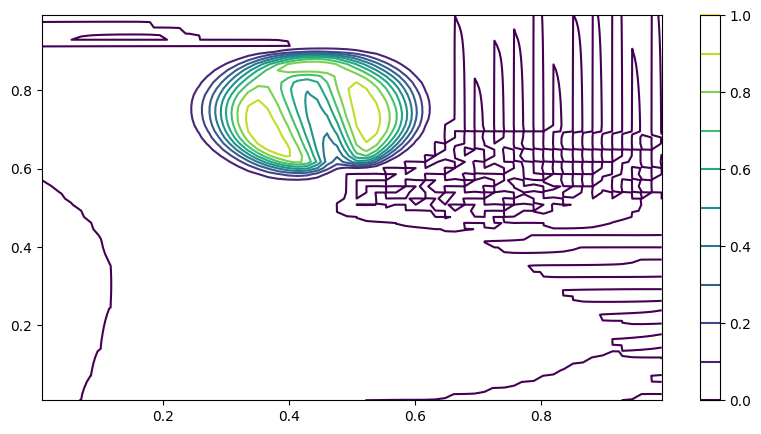

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
im, cbar = vis.plot_2d_slice(
    sim, ax, "rho", colorbar=True, levels=np.linspace(0, 1, 11)
)
print(type(cbar))

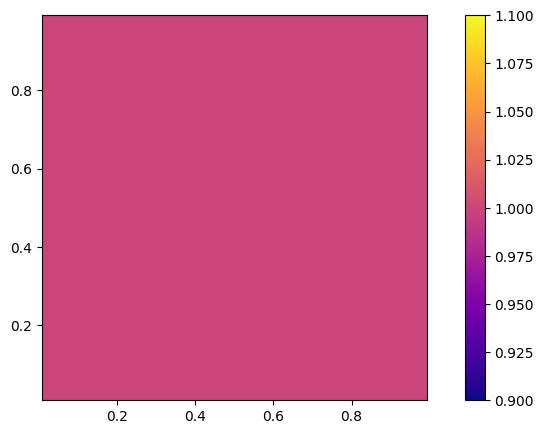

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "troubles", cmap=plt.cm.plasma)
ax.figure.colorbar(ax.images[0], ax=ax)

In [6]:
sim.timer.print_report()

Category                        Calls      Cumulative Time
------------------------------------------------------------
MOOD_loop                          80                 0.43
apply_bc                          162                 0.17
compute_dt                         20                 0.00
cuda_sync                           0                 0.00
detect_troubled_cells              80                 0.14
minisnapshot                       21                 0.00
revise_fluxes                      80                 0.29
riemann_solver                    320                 0.07
snapshot                            2                 0.02
take_step                          20                 1.03
wall                                1                 1.05
zhang_shu_limiter                   0                 0.00

